# Outros Tipos de Regressão

Neste notebook estarão presentes os códigos relacionados a outros tipos de regressão que não sejam linear, como: regressão polinomial, regressão com árvores de decisão, regressão com random forest, regressão com vetores de suporte, com redes neurais e etc.

## Regressão Polinomial

### Importações

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Base Plano de Saúde

In [3]:
plano_saude2 = pd.read_csv('../data/plano_saude2.csv')
plano_saude2

,idade,custo
0,18,470
1,23,520
2,28,630
3,33,830
4,38,1150
5,43,1530
6,48,2040
7,53,3080
8,58,5100
9,63,10100


### Separação das Variáveis

In [4]:
X_plano_saude2 = plano_saude2.iloc[:, 0:1].values
y_plano_saude2 = plano_saude2.iloc[:,1].values

In [5]:
X_plano_saude2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [6]:
y_plano_saude2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

### Criação e Treinamento do 'Modelo'

Elevando os valores do atributo idade ao quadrado.

In [7]:
poly = PolynomialFeatures(degree=4)
X_plano_saude2_poly = poly.fit_transform(X_plano_saude2)

In [8]:
X_plano_saude2_poly.shape

(10, 5)

In [9]:
X_plano_saude2_poly

array([[1.0000000e+00, 1.8000000e+01, 3.2400000e+02, 5.8320000e+03,
        1.0497600e+05],
       [1.0000000e+00, 2.3000000e+01, 5.2900000e+02, 1.2167000e+04,
        2.7984100e+05],
       [1.0000000e+00, 2.8000000e+01, 7.8400000e+02, 2.1952000e+04,
        6.1465600e+05],
       [1.0000000e+00, 3.3000000e+01, 1.0890000e+03, 3.5937000e+04,
        1.1859210e+06],
       [1.0000000e+00, 3.8000000e+01, 1.4440000e+03, 5.4872000e+04,
        2.0851360e+06],
       [1.0000000e+00, 4.3000000e+01, 1.8490000e+03, 7.9507000e+04,
        3.4188010e+06],
       [1.0000000e+00, 4.8000000e+01, 2.3040000e+03, 1.1059200e+05,
        5.3084160e+06],
       [1.0000000e+00, 5.3000000e+01, 2.8090000e+03, 1.4887700e+05,
        7.8904810e+06],
       [1.0000000e+00, 5.8000000e+01, 3.3640000e+03, 1.9511200e+05,
        1.1316496e+07],
       [1.0000000e+00, 6.3000000e+01, 3.9690000e+03, 2.5004700e+05,
        1.5752961e+07]])

18 * 18 = 324 = 3.240e+02

23 * 23 = 529 = 5.290e+02
...

In [10]:
X_plano_saude2_poly[0]

array([1.00000e+00, 1.80000e+01, 3.24000e+02, 5.83200e+03, 1.04976e+05])

In [11]:
X_plano_saude2_poly[1]

array([1.00000e+00, 2.30000e+01, 5.29000e+02, 1.21670e+04, 2.79841e+05])

In [12]:
regressor_saude_polinomial = LinearRegression()
regressor_saude_polinomial.fit(X_plano_saude2_poly, y_plano_saude2)

LinearRegression()

In [27]:
# b0
regressor_saude_polinomial.intercept_

np.float64(16561.974637941225)

In [28]:
# b1 (n)
regressor_saude_polinomial.coef_

array([ 0.00000000e+00, -2.12242253e+03,  9.90404199e+01, -1.95058276e+00,
        1.40792541e-02])

### Previsões

In [13]:
# Novo registro
novo = [[40]]

In [14]:
novo = poly.transform(novo)

In [15]:
regressor_saude_polinomial.predict(novo)

array([1335.33958016])

In [16]:
previsoes = regressor_saude_polinomial.predict(X_plano_saude2_poly)
previsoes

array([ 549.65035466,  345.85081577,  616.53845994,  975.83915951,
       1249.06759854, 1472.72727271, 1894.51048941, 2973.29836768,
       5379.16083826, 9993.35664352])

### Gráfico

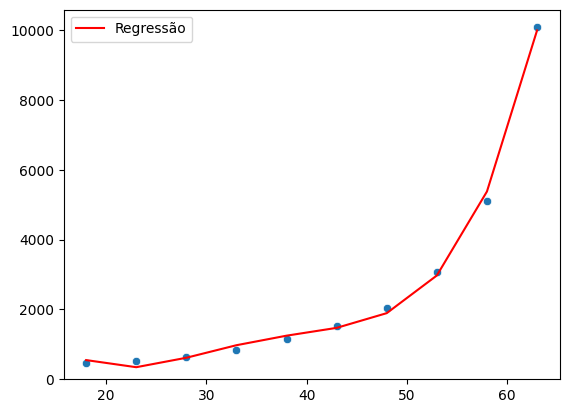

In [17]:
grafico = sns.scatterplot(x=X_plano_saude2[:,0], y=y_plano_saude2)
# Inserindo o gráfico de previsões
plt.plot(X_plano_saude2[:,0], previsoes, color='red', label='Regressão')
plt.ylim(0, None)
plt.legend(loc='upper left')
plt.show()

### Base Preço Casas

In [18]:
base_casas = pd.read_csv('../data/house_prices.csv')

### Separação das Variáveis


In [19]:
X_casas = base_casas.iloc[:, 3:19].values
y_casas = base_casas.iloc[:, 2].values

In [21]:
# Divisão dos dados em treino e teste
X_casas_treinamento, X_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(X_casas, y_casas, test_size=0.3, random_state=0)

In [22]:
X_casas_treinamento.shape

(15129, 16)

In [23]:
X_casas_teste.shape

(6484, 16)

### Criação do 'Modelo'

In [24]:
poly = PolynomialFeatures(degree=2)
X_casas_treinamento_poly = poly.fit_transform(X_casas_treinamento)
X_casas_teste_poly = poly.transform(X_casas_teste)

In [25]:
X_casas_treinamento_poly.shape, X_casas_teste_poly.shape

((15129, 153), (6484, 153))

In [26]:
regressor_casas_poly = LinearRegression()
regressor_casas_poly.fit(X_casas_treinamento_poly, y_casas_treinamento)

LinearRegression()

In [27]:
regressor_casas_poly.score(X_casas_treinamento_poly, y_casas_treinamento)

0.7924863532435756

In [28]:
regressor_casas_poly.score(X_casas_teste_poly, y_casas_teste)

0.7945486450062598

Ganho considerável comparada a regressão simples e múltipla.

### Previsões

In [29]:
previsoes = regressor_casas_poly.predict(X_casas_teste_poly)
previsoes

array([ 442197.0160252 , 1956399.3016603 ,  576589.99247741, ...,
        350582.46310049,  246776.52417187,  221178.81496017])

In [30]:
# valor real
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [32]:
# Calculando erros
mean_absolute_error(y_casas_teste, previsoes)

105307.16380024166

## Regressão com Árvores de Decisão

### Importações


In [35]:
from sklearn.tree import DecisionTreeRegressor

### Base Plano Saúde

In [33]:
X_plano_saude2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [34]:
y_plano_saude2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

### Criação 'Modelo' e Treinamento

In [36]:
regressor_arvore_saude = DecisionTreeRegressor()
regressor_arvore_saude.fit(X_plano_saude2, y_plano_saude2)

DecisionTreeRegressor()

### Previsões

In [37]:
previsoes = regressor_arvore_saude.predict(X_plano_saude2)
previsoes

array([  470.,   520.,   630.,   830.,  1150.,  1530.,  2040.,  3080.,
        5100., 10100.])

Nota-se que os valores são exatamente iguais aos passados na base de dados.

In [38]:
regressor_arvore_saude.score(X_plano_saude2, y_plano_saude2)

1.0

Isso acontece por conta da divisão dos splits.

### Gráfico

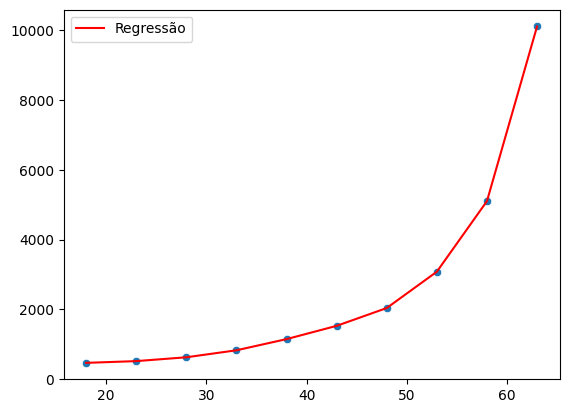

In [39]:
grafico = sns.scatterplot(x=X_plano_saude2[:,0], y=y_plano_saude2)
# Inserindo o gráfico de previsões
plt.plot(X_plano_saude2[:,0], previsoes, color='red', label='Regressão')
plt.ylim(0, None)
plt.legend(loc='upper left')
plt.show()

### Codificação Adicional para verificar os splits

In [42]:
X_teste_arvore = np.arange(min(X_plano_saude2), max(X_plano_saude2), 0.1) #incremendo de 0.1
X_teste_arvore

C:\Users\Emanuelle\AppData\Local\Temp\ipykernel_19612\3569147619.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_teste_arvore = np.arange(min(X_plano_saude2), max(X_plano_saude2), 0.1) #incremendo de 0.1


array([18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19. ,
       19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. , 20.1,
       20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. , 21.1, 21.2,
       21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22. , 22.1, 22.2, 22.3,
       22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23. , 23.1, 23.2, 23.3, 23.4,
       23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5,
       24.6, 24.7, 24.8, 24.9, 25. , 25.1, 25.2, 25.3, 25.4, 25.5, 25.6,
       25.7, 25.8, 25.9, 26. , 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7,
       26.8, 26.9, 27. , 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8,
       27.9, 28. , 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9,
       29. , 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30. ,
       30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31. , 31.1,
       31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32. , 32.1, 32.2,
       32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33

In [43]:
X_teste_arvore.shape

(450,)

In [44]:
X_teste_arvore = X_teste_arvore.reshape(-1,1)


In [45]:
X_teste_arvore.shape

(450, 1)

#### Visualização da Divisão dos Splits

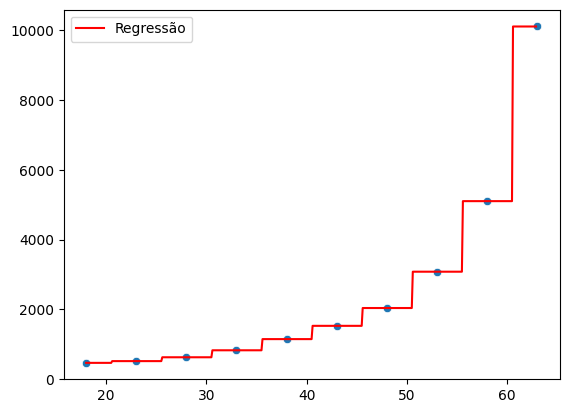

In [46]:
grafico = sns.scatterplot(x=X_plano_saude2.ravel(), y=y_plano_saude2)
# Inserindo o gráfico de previsões
plt.plot(X_teste_arvore.ravel(), regressor_arvore_saude.predict(X_teste_arvore), color='red', label='Regressão')
plt.ylim(0, None)
plt.legend(loc='upper left')
plt.show()

In [47]:
regressor_arvore_saude.predict([[40]])

array([1150.])

### Base Preço Casas

In [59]:
X_casas_treinamento.shape

(15129, 16)

In [60]:
X_casas_treinamento

array([[ 4.00000e+00,  1.50000e+00,  1.39000e+03, ...,  9.81330e+04,
         4.77224e+01, -1.22332e+02],
       [ 3.00000e+00,  1.50000e+00,  1.45000e+03, ...,  9.81330e+04,
         4.77725e+01, -1.22349e+02],
       [ 5.00000e+00,  2.75000e+00,  2.86000e+03, ...,  9.80520e+04,
         4.77082e+01, -1.22104e+02],
       ...,
       [ 3.00000e+00,  2.25000e+00,  2.36000e+03, ...,  9.80420e+04,
         4.73856e+01, -1.22158e+02],
       [ 4.00000e+00,  2.00000e+00,  2.37000e+03, ...,  9.80010e+04,
         4.72831e+01, -1.22279e+02],
       [ 4.00000e+00,  2.25000e+00,  2.38000e+03, ...,  9.80080e+04,
         4.76126e+01, -1.22120e+02]])

In [61]:
y_casas_treinamento

array([400000., 430000., 720000., ..., 431000., 411000., 699900.])

In [62]:
X_casas_teste.shape

(6484, 16)

### Criação do 'Modelo' e Treinamento

In [63]:
regressor_arvore_casas = DecisionTreeRegressor()
regressor_arvore_casas.fit(X_casas_treinamento, y_casas_treinamento)

DecisionTreeRegressor()

In [64]:
regressor_arvore_casas.score(X_casas_treinamento, y_casas_treinamento)

0.9992712177726063

In [68]:
regressor_arvore_casas.score(X_casas_teste, y_casas_teste)

0.7020203154562379

Valor do score ficou melhor que a regressão linear simples e múltipla e ficou pior em relação a regressão polinomial.

### Previsões

In [55]:
previsoes = regressor_arvore_casas.predict(X_casas_teste)
previsoes

array([ 289000., 2340000.,  483000., ...,  289000.,  197400.,  218000.])

In [56]:
# valor real
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [57]:
mean_absolute_error(y_casas_teste, previsoes)

99589.65630783467

Interpretação: O algoritmo pode errar 99.589,65 para cima ou para baixo. Até então o menor valor se comparado com os outros algoritmos.

## Regressão com Random Forest

### Importações

In [71]:
from sklearn.ensemble import RandomForestRegressor

### Base Plano Saúde

In [69]:
X_plano_saude2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [70]:
y_plano_saude2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

### Criação do Modelo e Treinamento

In [72]:
regressor_random_forest_saude = RandomForestRegressor(n_estimators=10)
regressor_random_forest_saude.fit(X_plano_saude2, y_plano_saude2)

RandomForestRegressor(n_estimators=10)

In [73]:
regressor_random_forest_saude.score(X_plano_saude2, y_plano_saude2)

0.9872865321576731

In [74]:
X_teste_arvore

array([[18. ],
       [18.1],
       [18.2],
       [18.3],
       [18.4],
       [18.5],
       [18.6],
       [18.7],
       [18.8],
       [18.9],
       [19. ],
       [19.1],
       [19.2],
       [19.3],
       [19.4],
       [19.5],
       [19.6],
       [19.7],
       [19.8],
       [19.9],
       [20. ],
       [20.1],
       [20.2],
       [20.3],
       [20.4],
       [20.5],
       [20.6],
       [20.7],
       [20.8],
       [20.9],
       [21. ],
       [21.1],
       [21.2],
       [21.3],
       [21.4],
       [21.5],
       [21.6],
       [21.7],
       [21.8],
       [21.9],
       [22. ],
       [22.1],
       [22.2],
       [22.3],
       [22.4],
       [22.5],
       [22.6],
       [22.7],
       [22.8],
       [22.9],
       [23. ],
       [23.1],
       [23.2],
       [23.3],
       [23.4],
       [23.5],
       [23.6],
       [23.7],
       [23.8],
       [23.9],
       [24. ],
       [24.1],
       [24.2],
       [24.3],
       [24.4],
       [24.5],
       [24

In [76]:
regressor_random_forest_saude.predict([[40]])

array([1264.])

### Gráfico

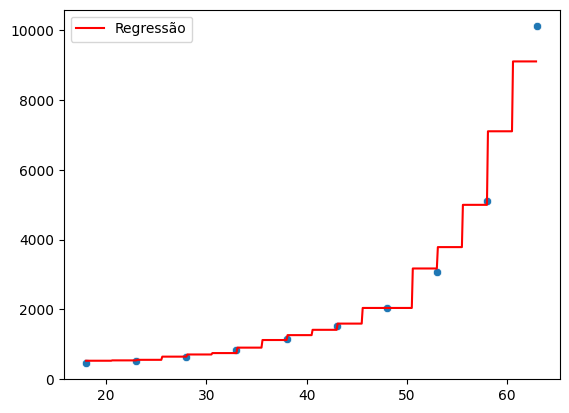

In [75]:
grafico = sns.scatterplot(x=X_plano_saude2.ravel(), y=y_plano_saude2)
# Inserindo o gráfico de previsões
plt.plot(X_teste_arvore.ravel(), regressor_random_forest_saude.predict(X_teste_arvore), color='red', label='Regressão')
plt.ylim(0, None)
plt.legend(loc='upper left')
plt.show()

### Base Preço Casas

In [78]:
X_casas_treinamento.shape

(15129, 16)

In [79]:
y_casas_treinamento

array([400000., 430000., 720000., ..., 431000., 411000., 699900.])

In [80]:
X_casas_teste

array([[ 2.00000e+00,  1.50000e+00,  1.43000e+03, ...,  9.81250e+04,
         4.77222e+01, -1.22290e+02],
       [ 4.00000e+00,  3.25000e+00,  4.67000e+03, ...,  9.80050e+04,
         4.76350e+01, -1.22164e+02],
       [ 2.00000e+00,  7.50000e-01,  1.44000e+03, ...,  9.81070e+04,
         4.76707e+01, -1.22364e+02],
       ...,
       [ 3.00000e+00,  2.50000e+00,  2.15000e+03, ...,  9.80580e+04,
         4.74514e+01, -1.22089e+02],
       [ 3.00000e+00,  1.75000e+00,  1.48000e+03, ...,  9.80320e+04,
         4.73657e+01, -1.22280e+02],
       [ 3.00000e+00,  1.00000e+00,  1.32000e+03, ...,  9.80920e+04,
         4.73120e+01, -1.22183e+02]])

### Criação do 'Modelo' Regressor

In [81]:
regressor_random_forest_casas = RandomForestRegressor(n_estimators=100)
regressor_random_forest_casas.fit(X_casas_treinamento, y_casas_treinamento)

RandomForestRegressor()

In [82]:
regressor_random_forest_casas.score(X_casas_treinamento, y_casas_treinamento)

0.9804324361946414

In [83]:
regressor_random_forest_casas.score(X_casas_teste, y_casas_teste)

0.8783056036762137

Até então, é o regressor de maior score superando as regressões simples, múltipla, polinomial árvore.

### Previsão

In [84]:
previsoes = regressor_random_forest_casas.predict(X_casas_teste)
previsoes

array([ 310858.58, 1665398.8 ,  524620.5 , ...,  352116.13,  233588.23,
        206963.32])

In [85]:
# valor real
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [86]:
mean_absolute_error(y_casas_teste, previsoes)

67799.48348171446

Interpretação: algoritmo preve com média de erro de 67.779,48 para cima ou para baixo. Até então, o valor mais baixo (melhor) entre as regressões.

## Regressão com Suporte de Vetores

### Importações

In [100]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

### Base Plano Saúde

In [88]:
X_plano_saude2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [89]:
y_plano_saude2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

- Kernel Linear
- Kernel Polinomial
- Kernel RBF (melhor desempenho)

### Criando 'Modelo' Regressor

#### Kernel Linear

In [91]:
# Kernel Linear
regressor_svr_saude_linear = SVR(kernel='linear')
regressor_svr_saude_linear.fit(X_plano_saude2, y_plano_saude2)

SVR(kernel='linear')

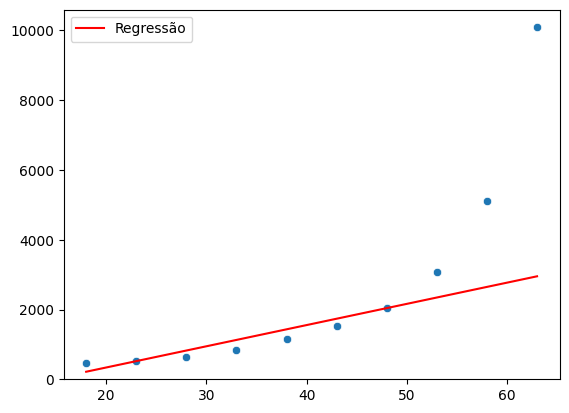

In [92]:
grafico = sns.scatterplot(x=X_plano_saude2.ravel(), y=y_plano_saude2)
# Inserindo o gráfico de previsões
plt.plot(X_plano_saude2.ravel(), regressor_svr_saude_linear.predict(X_plano_saude2), color='red', label='Regressão')
plt.ylim(0, None)
plt.legend(loc='upper left')
plt.show()

#### Kernel Polinomial

In [96]:
# Kernel Polinomial
regressor_svr_saude_poly = SVR(kernel='poly', degree=4)
regressor_svr_saude_poly.fit(X_plano_saude2, y_plano_saude2)

SVR(degree=4, kernel='poly')

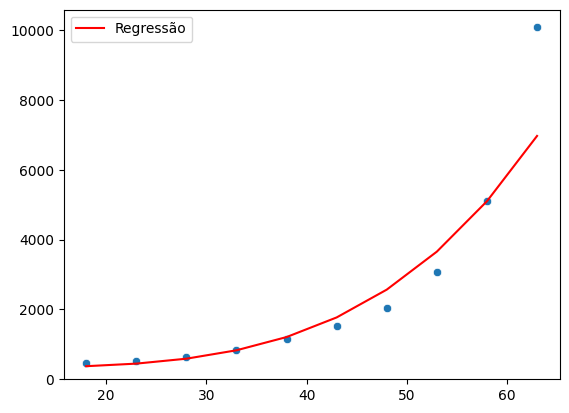

In [97]:
grafico = sns.scatterplot(x=X_plano_saude2.ravel(), y=y_plano_saude2)
# Inserindo o gráfico de previsões
plt.plot(X_plano_saude2.ravel(), regressor_svr_saude_poly.predict(X_plano_saude2), color='red', label='Regressão')
plt.ylim(0, None)
plt.legend(loc='upper left')
plt.show()

Resultados serão parecidos com os de regressão polinomial feitos anteriormente.

#### Kernel RBF

In [98]:
# Kernel rbf
regressor_svr_saude_rbf = SVR(kernel='rbf')
regressor_svr_saude_rbf.fit(X_plano_saude2, y_plano_saude2)

SVR()

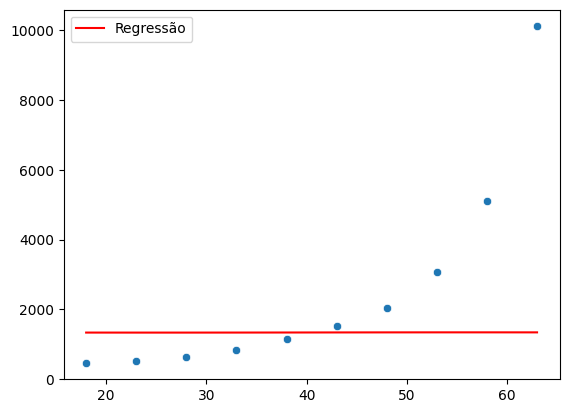

In [99]:
grafico = sns.scatterplot(x=X_plano_saude2.ravel(), y=y_plano_saude2)
# Inserindo o gráfico de previsões
plt.plot(X_plano_saude2.ravel(), regressor_svr_saude_rbf.predict(X_plano_saude2), color='red', label='Regressão')
plt.ylim(0, None)
plt.legend(loc='upper left')
plt.show()

Gerou um gráfico estranho. Porque?

Os dados da base de dados de plano de saúde não estão normalizados! Para o algoritmo de 'rbf' é necessário aplicar a normalização! (os outros algoritmos que trabalha como números normalizados fazem o processo de normalização internamente)

#### Normalizando os Dados

In [101]:
scaler_x = StandardScaler()
X_plano_saude2_scaled = scaler_x.fit_transform(X_plano_saude2)
scaler_y = StandardScaler()
y_plano_saude2_scaled = scaler_y.fit_transform(y_plano_saude2.reshape(-1,1))

In [102]:
X_plano_saude2_scaled

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [103]:
y_plano_saude2_scaled

array([[-0.72401136],
       [-0.7065653 ],
       [-0.66818397],
       [-0.59839975],
       [-0.48674498],
       [-0.35415495],
       [-0.17620517],
       [ 0.18667281],
       [ 0.8914935 ],
       [ 2.63609918]])

#### Refazendo o Kernel RBF com dados Normalizados

In [106]:
regressor_svr_saude_rbf = SVR(kernel='rbf')
regressor_svr_saude_rbf.fit(X_plano_saude2_scaled, y_plano_saude2_scaled.ravel())

SVR()

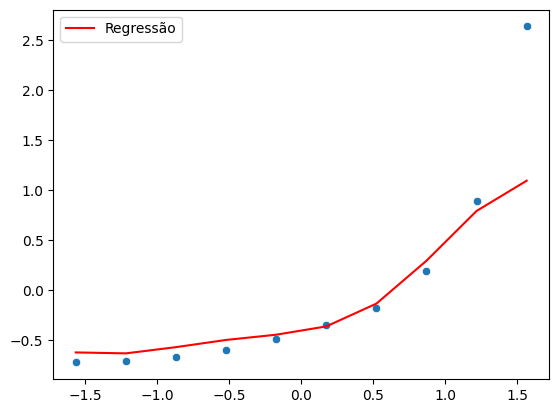

In [108]:
grafico = sns.scatterplot(x=X_plano_saude2_scaled.ravel(), y=y_plano_saude2_scaled.ravel())
# Inserindo o gráfico de previsões
plt.plot(X_plano_saude2_scaled.ravel(), regressor_svr_saude_rbf.predict(X_plano_saude2_scaled), color='red', label='Regressão')
plt.legend(loc='upper left')
plt.show()

#### Previsão

O algoritmo foi treinado com os dados normalizados, ao fazer a previsão inicial do 40 o resultado foi = 0.01359678 (normalizado). Para saber o valor original, deve-se escalonar o valor.

In [109]:
regressor_svr_saude_rbf.predict([[40]])

array([0.01359678])

In [122]:
novo = [[40]]

In [123]:
# Escalonando
novo = scaler_x.transform(novo)
novo

array([[-0.03481553]])

In [126]:
scaler_y.inverse_transform(regressor_svr_saude_rbf.predict(novo).reshape(-1,1))

array([[1333.85650748]])

### Base Preço Casas

In [127]:
X_casas_treinamento.shape

(15129, 16)

In [128]:
X_casas_treinamento

array([[ 4.00000e+00,  1.50000e+00,  1.39000e+03, ...,  9.81330e+04,
         4.77224e+01, -1.22332e+02],
       [ 3.00000e+00,  1.50000e+00,  1.45000e+03, ...,  9.81330e+04,
         4.77725e+01, -1.22349e+02],
       [ 5.00000e+00,  2.75000e+00,  2.86000e+03, ...,  9.80520e+04,
         4.77082e+01, -1.22104e+02],
       ...,
       [ 3.00000e+00,  2.25000e+00,  2.36000e+03, ...,  9.80420e+04,
         4.73856e+01, -1.22158e+02],
       [ 4.00000e+00,  2.00000e+00,  2.37000e+03, ...,  9.80010e+04,
         4.72831e+01, -1.22279e+02],
       [ 4.00000e+00,  2.25000e+00,  2.38000e+03, ...,  9.80080e+04,
         4.76126e+01, -1.22120e+02]])

In [129]:
y_casas_treinamento

array([400000., 430000., 720000., ..., 431000., 411000., 699900.])

In [131]:
X_casas_teste.shape

(6484, 16)

### Normalização dos Dados (Preço das Casas)

In [144]:
scaler_x_casas =  StandardScaler()
X_casas_treinamento_scaled = scaler_x_casas.fit_transform(X_casas_treinamento)

scaler_y_casas =  StandardScaler()
y_casas_treinamento_scaled = scaler_y_casas.fit_transform(y_casas_treinamento.reshape(-1,1))


In [145]:
X_casas_treinamento_scaled

array([[ 0.67170039, -0.79711466, -0.74522967, ...,  1.03727271,
         1.17348387, -0.83797629],
       [-0.38696772, -0.79711466, -0.68028398, ...,  1.03727271,
         1.53476983, -0.95879989],
       [ 1.7303685 ,  0.82292131,  0.84593978, ..., -0.48008241,
         1.07108346,  0.78248142],
       ...,
       [-0.38696772,  0.17490692,  0.30472568, ..., -0.66741021,
        -1.25528083,  0.3986888 ],
       [ 0.67170039, -0.14910028,  0.31554996, ..., -1.43545415,
        -1.99443873, -0.46129094],
       [ 0.67170039,  0.17490692,  0.32637425, ..., -1.3043247 ,
         0.38168351,  0.66876509]])

In [146]:
y_casas_treinamento_scaled

array([[-0.38454326],
       [-0.3024967 ],
       [ 0.49062008],
       ...,
       [-0.29976181],
       [-0.35445952],
       [ 0.43564888]])

In [147]:
X_casas_teste_scaled = scaler_x_casas.transform(X_casas_teste)
y_casas_teste_scaled = scaler_y_casas.transform(y_casas_teste.reshape(-1,1))

In [148]:
X_casas_teste_scaled

array([[-1.44563583, -0.79711466, -0.70193254, ...,  0.88741047,
         1.17204161, -0.53947092],
       [ 0.67170039,  1.47093569,  2.80513482, ..., -1.36052304,
         0.54321655,  0.35604518],
       [-1.44563583, -1.76913625, -0.69110826, ...,  0.55022044,
         0.80065984, -1.06540895],
       ...,
       [-0.38696772,  0.49891411,  0.07741576, ..., -0.36768574,
        -0.78077751,  0.88909048],
       [-0.38696772, -0.47310747, -0.64781113, ..., -0.854738  ,
        -1.39878563, -0.46839822],
       [-0.38696772, -1.44512905, -0.82099964, ...,  0.26922876,
        -1.78603226,  0.22100704]])

In [149]:
y_casas_teste_scaled

array([[-0.66623646],
       [ 2.83715179],
       [ 0.05878167],
       ...,
       [-0.43924097],
       [-0.74554814],
       [-0.91511104]])

### Criando o 'Modelo' Regressor

In [150]:
regressor_svr_casas = SVR(kernel='rbf')
regressor_svr_casas.fit(X_casas_treinamento_scaled, y_casas_treinamento_scaled.ravel())

SVR()

In [151]:
regressor_svr_casas.score(X_casas_treinamento_scaled, y_casas_treinamento_scaled)

0.8123337393146999

In [152]:
regressor_svr_casas.score(X_casas_teste_scaled, y_casas_teste_scaled)

0.7374454724624955

### Previsão

In [153]:
previsoes = regressor_svr_casas.predict(X_casas_teste_scaled)
previsoes

array([-0.54571552,  3.46454238,  0.02286424, ..., -0.46405796,
       -0.91113329, -1.03334346])

In [164]:
# valor real
y_casas_teste_scaled

array([[-0.66623646],
       [ 2.83715179],
       [ 0.05878167],
       ...,
       [-0.43924097],
       [-0.74554814],
       [-0.91511104]])

### Desescalonando os valores

In [166]:
y_casas_teste_inverse = scaler_y_casas.inverse_transform(y_casas_teste_scaled)
previsoes_inverse = scaler_y_casas.inverse_transform(previsoes.reshape(-1,1))

In [167]:
y_casas_teste_inverse

array([[ 297000.],
       [1578000.],
       [ 562100.],
       ...,
       [ 380000.],
       [ 268000.],
       [ 206000.]])

In [168]:
previsoes_inverse

array([[ 341068.00437506],
       [1807402.87779178],
       [ 548966.93331463],
       ...,
       [ 370925.76457821],
       [ 207454.44649635],
       [ 162768.78477289]])

In [169]:
mean_absolute_error(y_casas_teste_inverse, previsoes_inverse)

82453.02198930961

Interpretação: O algoritmo pode prever com média de erro de 82.453,02 para cima ou para baixo. O valor é menor que a maioria das regressões com exceção da random forest.

## Regressão com Redes Neurais

Os dados precisam estar escalonados.

### Importação

In [172]:
from sklearn.neural_network import MLPRegressor

### Base Plano Saúde

In [170]:
X_plano_saude2_scaled

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [171]:
y_plano_saude2_scaled

array([[-0.72401136],
       [-0.7065653 ],
       [-0.66818397],
       [-0.59839975],
       [-0.48674498],
       [-0.35415495],
       [-0.17620517],
       [ 0.18667281],
       [ 0.8914935 ],
       [ 2.63609918]])

### Criando a Rede Neural

In [175]:
regressor_rna_saude = MLPRegressor(max_iter=1000)
regressor_rna_saude.fit(X_plano_saude2_scaled, y_plano_saude2_scaled.ravel())

MLPRegressor(max_iter=1000)

In [176]:
regressor_rna_saude.score(X_plano_saude2_scaled, y_plano_saude2_scaled)

0.959464874478597

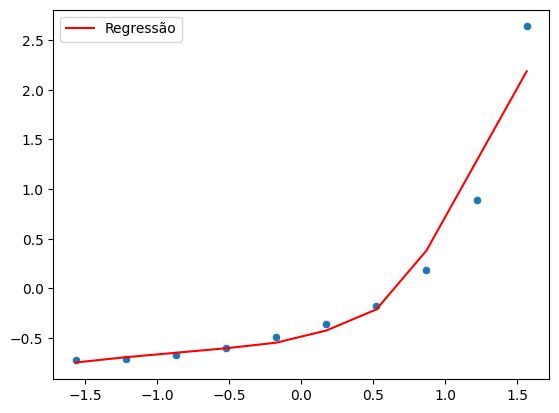

In [177]:
grafico = sns.scatterplot(x=X_plano_saude2_scaled.ravel(), y=y_plano_saude2_scaled.ravel())
# Inserindo o gráfico de previsões
plt.plot(X_plano_saude2_scaled.ravel(), regressor_rna_saude.predict(X_plano_saude2_scaled), color='red', label='Regressão')
plt.legend(loc='upper left')
plt.show()

### Previsão

In [179]:
novo = [[40]]
novo = scaler_x.transform(novo)
novo

array([[-0.03481553]])

In [182]:
scaler_y.inverse_transform(regressor_rna_saude.predict(novo).reshape(-1,1))

array([[1086.91512103]])

### Base Preço Casas

In [183]:
X_casas_treinamento_scaled.shape

(15129, 16)

In [184]:
X_casas_treinamento_scaled

array([[ 0.67170039, -0.79711466, -0.74522967, ...,  1.03727271,
         1.17348387, -0.83797629],
       [-0.38696772, -0.79711466, -0.68028398, ...,  1.03727271,
         1.53476983, -0.95879989],
       [ 1.7303685 ,  0.82292131,  0.84593978, ..., -0.48008241,
         1.07108346,  0.78248142],
       ...,
       [-0.38696772,  0.17490692,  0.30472568, ..., -0.66741021,
        -1.25528083,  0.3986888 ],
       [ 0.67170039, -0.14910028,  0.31554996, ..., -1.43545415,
        -1.99443873, -0.46129094],
       [ 0.67170039,  0.17490692,  0.32637425, ..., -1.3043247 ,
         0.38168351,  0.66876509]])

In [185]:
y_casas_treinamento_scaled

array([[-0.38454326],
       [-0.3024967 ],
       [ 0.49062008],
       ...,
       [-0.29976181],
       [-0.35445952],
       [ 0.43564888]])

In [186]:
X_casas_teste_scaled.shape

(6484, 16)

### Criando a Rede Neural

Número de atributos + numero de neuronios na camada de saida / 2:

(16 + 1) / 2 = 8.5 -> 9

In [189]:
# hidden_layer_sizes são as camadas ocultas, nesse caso cada uma possui 9 neurônios
# 16 ce -> 9 pco -> 9 sco -> 1 cs
regressor_rna_casas = MLPRegressor(max_iter=1000, hidden_layer_sizes=(9,9))
regressor_rna_casas.fit(X_casas_treinamento_scaled, y_casas_treinamento_scaled.ravel())

MLPRegressor(hidden_layer_sizes=(9, 9), max_iter=1000)

In [190]:
regressor_rna_casas.score(X_casas_treinamento_scaled, y_casas_treinamento_scaled)

0.8956803975882374

In [191]:
regressor_rna_casas.score(X_casas_teste_scaled, y_casas_teste_scaled)

0.8858641852204597

Supera a maioria dos algoritmos de regressão, e fica praticamente igual ao de random forest.

### Previsão

In [192]:
previsoes = regressor_rna_casas.predict(X_casas_teste_scaled)
previsoes

array([-5.44501737e-01,  3.85617415e+00, -5.05935945e-04, ...,
       -5.12046316e-01, -8.42338194e-01, -9.24630120e-01])

In [193]:
# valores reais de comparação
y_casas_teste_scaled

array([[-0.66623646],
       [ 2.83715179],
       [ 0.05878167],
       ...,
       [-0.43924097],
       [-0.74554814],
       [-0.91511104]])

In [195]:
y_casas_teste_inverse = scaler_y_casas.inverse_transform(y_casas_teste_scaled)
previsoes_inverse = scaler_y_casas.inverse_transform(previsoes.reshape(-1,1))

In [196]:
y_casas_teste_inverse

array([[ 297000.],
       [1578000.],
       [ 562100.],
       ...,
       [ 380000.],
       [ 268000.],
       [ 206000.]])

In [197]:
previsoes_inverse

array([[ 341511.81860301],
       [1950601.47944877],
       [ 540421.72263924],
       ...,
       [ 353379.0143917 ],
       [ 232609.10081819],
       [ 202519.38519784]])

In [198]:
mean_absolute_error(y_casas_teste_inverse, previsoes_inverse)

74450.61093842125

Segundo melhor resultado, perdendo apenas para o random forest. Média de erro de 74.450,61 para cima ou para baixo.